*   Projeto Classificadores 
*   Aluno: Marcio Rafael Buzoli ST3004414

*   Disciplina: Mineração de Dados 







## Importando bibliotecas 


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib.figure import Figure
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/drive/MyDrive/Faculdade/Data_Mining/Dataset Teste.csv',sep=',')
dados = df

# Dados


In [11]:
df.head()

,AVG Current,STD Current,MAX Current,MIN Current,Range Current,Kurtosis Current,RMS Current,Skewness Current,Entropy Current,AVG Torque,...,AVG Active Power,STD Active Power,MAX Active Power,MIN Active Power,Range Active Power,Kurtosis Active Power,RMS Active Power,Skewness Active Power,Entropy Active Power,Class
0,0.491028,0.177287,3.587769,0.008118,3.579651,195.977268,0.522022,13.050725,6.874759,0.175116,...,0.448055,0.160866,3.926880,0.334106,3.592774,236.696934,0.476031,13.103412,6.873575,0
1,0.490237,0.144970,3.176880,0.082336,3.094544,154.913329,0.511202,11.145419,6.882446,0.175544,...,0.445957,0.170479,3.884033,0.084290,3.799743,284.860734,0.477401,15.525787,6.873353,0
2,0.485529,0.125391,3.342834,0.302307,3.040527,292.708198,0.501443,15.148624,6.889480,0.163829,...,0.444681,0.149242,3.468689,0.330688,3.138001,251.237091,0.469033,14.383626,6.879017,0
3,0.489232,0.177605,3.989441,0.333313,3.656128,284.769340,0.520442,15.824336,6.877487,0.157104,...,0.442829,0.142711,3.971863,0.285767,3.686096,391.788604,0.465235,17.487607,6.882201,0
4,0.485822,0.117226,2.547180,0.302185,2.244995,161.052549,0.499751,11.877800,6.890492,0.165665,...,0.444358,0.126080,2.581604,0.333130,2.248474,133.481241,0.461881,10.474812,6.883568,0


Os dados presentes nesse dataset são referentes ao funcionamento de uma bomba centrifuga em diferentes estados de operação, os atributos são baseados nos seguintes parâmetros:

*	Corrente elétrica
*	Torque
*	Fator de potencia

Para cada parâmetro é possível extrair diversos dados, para nosso estudo levamos em consideração os 9 atributos a seguir:

*	Média
*	Desvio Padrão
*	Valor máximo
*	Valor mínimo
*	Range
*	Kurtosis
*	RMS (root mean square, raiz quadrática média)
*	Skewness (Distorção)
*	Entropia




In [6]:
df['Class'].value_counts()

2    65
1    61
0    57
Name: Class, dtype: int64

As leituras estão classificadas em 3 status de funcionamento:

* Classe 0 – Funcionamento Normal 
* Classe 1 – Funcionamento com cavitação 
* Classe 2 – Funcionamento a seco


In [16]:
dados.describe().round(6)

,AVG Current,STD Current,MAX Current,MIN Current,Range Current,Kurtosis Current,RMS Current,Skewness Current,Entropy Current,AVG Torque,...,AVG Active Power,STD Active Power,MAX Active Power,MIN Active Power,Range Active Power,Kurtosis Active Power,RMS Active Power,Skewness Active Power,Entropy Active Power,Class
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.461017,0.053276,1.371915,0.383552,0.988363,75.103801,0.467972,4.378381,6.892181,0.101512,...,0.314085,0.070144,1.235205,0.227170,1.008035,63.725025,0.323746,3.961013,6.882471,1.043716
std,0.019653,0.064444,1.398287,0.085853,1.460842,119.203378,0.029832,6.602997,0.075632,0.054538,...,0.118103,0.057851,1.433231,0.094281,1.387018,102.238911,0.126640,5.940065,0.075928,0.817562
min,0.437458,0.010548,0.455444,0.008118,0.035278,0.965374,0.437591,0.001121,5.960699,0.034575,...,0.163135,0.028354,0.207092,0.084290,0.092713,1.122328,0.165609,0.000197,5.944655,0.000000
25%,0.441504,0.011233,0.461914,0.333374,0.041016,1.137616,0.441644,0.020210,6.889712,0.035204,...,0.164718,0.029868,0.215424,0.115112,0.101227,1.233294,0.167388,0.035887,6.882884,0.000000
50%,0.458350,0.011940,0.481750,0.420776,0.045838,1.194273,0.458506,0.043624,6.907415,0.110466,...,0.348872,0.036581,0.419495,0.280334,0.136658,1.335297,0.350795,0.113815,6.891465,1.000000
75%,0.484392,0.117519,3.005218,0.435090,2.698334,177.369694,0.499740,12.215214,6.907430,0.162435,...,0.444343,0.126032,2.523803,0.289124,2.215576,128.140217,0.461860,10.276319,6.902117,2.000000
max,0.497391,0.221836,3.989441,0.451721,3.840271,447.552929,0.544572,19.715032,6.907468,0.177246,...,0.454994,0.213626,3.971863,0.371765,3.823242,391.788604,0.502603,17.487607,6.902558,2.000000


In [17]:
dados.corr().round(6)

,AVG Current,STD Current,MAX Current,MIN Current,Range Current,Kurtosis Current,RMS Current,Skewness Current,Entropy Current,AVG Torque,...,AVG Active Power,STD Active Power,MAX Active Power,MIN Active Power,Range Active Power,Kurtosis Active Power,RMS Active Power,Skewness Active Power,Entropy Active Power,Class
AVG Current,1.000000,0.908352,0.896340,-0.661163,0.896814,0.839167,0.982792,0.895700,-0.064636,0.971517,...,0.947891,0.896688,0.900513,0.738812,0.880297,0.831183,0.962639,0.894220,-0.018361,-0.986072
STD Current,0.908352,1.000000,0.985650,-0.713648,0.985384,0.905462,0.966046,0.959457,-0.098453,0.793397,...,0.737218,0.928303,0.928065,0.466770,0.927258,0.877925,0.771856,0.941973,-0.065184,-0.835866
MAX Current,0.896340,0.985650,1.000000,-0.714230,0.999154,0.955926,0.949280,0.979643,-0.089058,0.789379,...,0.732470,0.925603,0.924047,0.465659,0.923182,0.882509,0.767383,0.942149,-0.059289,-0.830427
MIN Current,-0.661163,-0.713648,-0.714230,1.000000,-0.742415,-0.704480,-0.679666,-0.745564,0.069071,-0.586557,...,-0.532975,-0.718060,-0.737655,-0.323167,-0.740265,-0.729991,-0.561399,-0.760196,0.059206,0.623268
Range Current,0.896814,0.985384,0.999154,-0.742415,1.000000,0.956394,0.948575,0.981510,-0.089304,0.790049,...,0.732428,0.928167,0.927830,0.464711,0.927156,0.887620,0.767516,0.946481,-0.060230,-0.831497
Kurtosis Current,0.839167,0.905462,0.955926,-0.704480,0.956394,1.000000,0.871093,0.979579,-0.075280,0.755984,...,0.700819,0.892330,0.890225,0.460499,0.888584,0.866312,0.735008,0.916398,-0.057693,-0.796202
RMS Current,0.982792,0.966046,0.949280,-0.679666,0.948575,0.871093,1.000000,0.928696,-0.079175,0.918227,...,0.882601,0.917625,0.920085,0.645276,0.906878,0.855457,0.904649,0.919775,-0.033825,-0.942683
Skewness Current,0.895700,0.959457,0.979643,-0.745564,0.981510,0.979579,0.928696,1.000000,-0.088540,0.801020,...,0.743796,0.942027,0.940724,0.487497,0.938930,0.903125,0.779334,0.963101,-0.067893,-0.845002
Entropy Current,-0.064636,-0.098453,-0.089058,0.069071,-0.089304,-0.075280,-0.079175,-0.088540,1.000000,-0.049778,...,-0.041457,-0.085459,-0.085851,-0.011947,-0.087899,-0.082314,-0.046509,-0.090721,0.994646,0.059047
AVG Torque,0.971517,0.793397,0.789379,-0.586557,0.790049,0.755984,0.918227,0.801020,-0.049778,1.000000,...,0.994072,0.809617,0.814507,0.834730,0.784906,0.738032,0.996439,0.796961,0.001483,-0.995233


# Normalizando os dados

In [18]:
df_norm = df[['AVG Current','STD Current', 'MAX Current', 'MIN Current', 'Range Current', 'Kurtosis Current', 'RMS Current', 'Skewness Current', 'Entropy Current', 'AVG Torque', 'STD Torque', 'MAX Torque', 'MIN Torque', 'Range Torque', 'Kurtosis Torque', 'RMS Torque', 'Skewness Torque', 'Entropy Torque','AVG Active Power', 'STD Active Power', 'MAX Active Power', 'MIN Active Power', 'Range Active Power', 'Kurtosis Active Power', 'RMS Active Power', 'Skewness Active Power', 'Entropy Active Power','Class']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.describe()

,AVG Current,STD Current,MAX Current,MIN Current,Range Current,Kurtosis Current,RMS Current,Skewness Current,Entropy Current,AVG Torque,...,AVG Active Power,STD Active Power,MAX Active Power,MIN Active Power,Range Active Power,Kurtosis Active Power,RMS Active Power,Skewness Active Power,Entropy Active Power,Class
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.393091,0.202229,0.259330,0.846329,0.250483,0.166011,0.283982,0.222039,0.983854,0.469174,...,0.517200,0.225562,0.273088,0.497017,0.245360,0.160246,0.469258,0.226495,0.979031,0.521858
std,0.327913,0.305004,0.395667,0.193537,0.383928,0.266921,0.278853,0.334941,0.079884,0.382266,...,0.404658,0.312250,0.380695,0.327961,0.371802,0.261704,0.375794,0.339677,0.079264,0.408781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067517,0.003242,0.001831,0.733214,0.001508,0.000386,0.037885,0.000968,0.981246,0.004405,...,0.005426,0.008174,0.002213,0.107216,0.002282,0.000284,0.005281,0.002041,0.979461,0.000000
50%,0.348589,0.006588,0.007444,0.930242,0.002775,0.000513,0.195502,0.002156,0.999944,0.531930,...,0.636393,0.044405,0.056419,0.681951,0.011780,0.000545,0.549523,0.006497,0.988419,0.500000
75%,0.783099,0.506281,0.721499,0.962508,0.699884,0.395005,0.580935,0.619567,0.999960,0.896188,...,0.963506,0.527217,0.615366,0.712526,0.569051,0.325131,0.879097,0.587630,0.999540,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


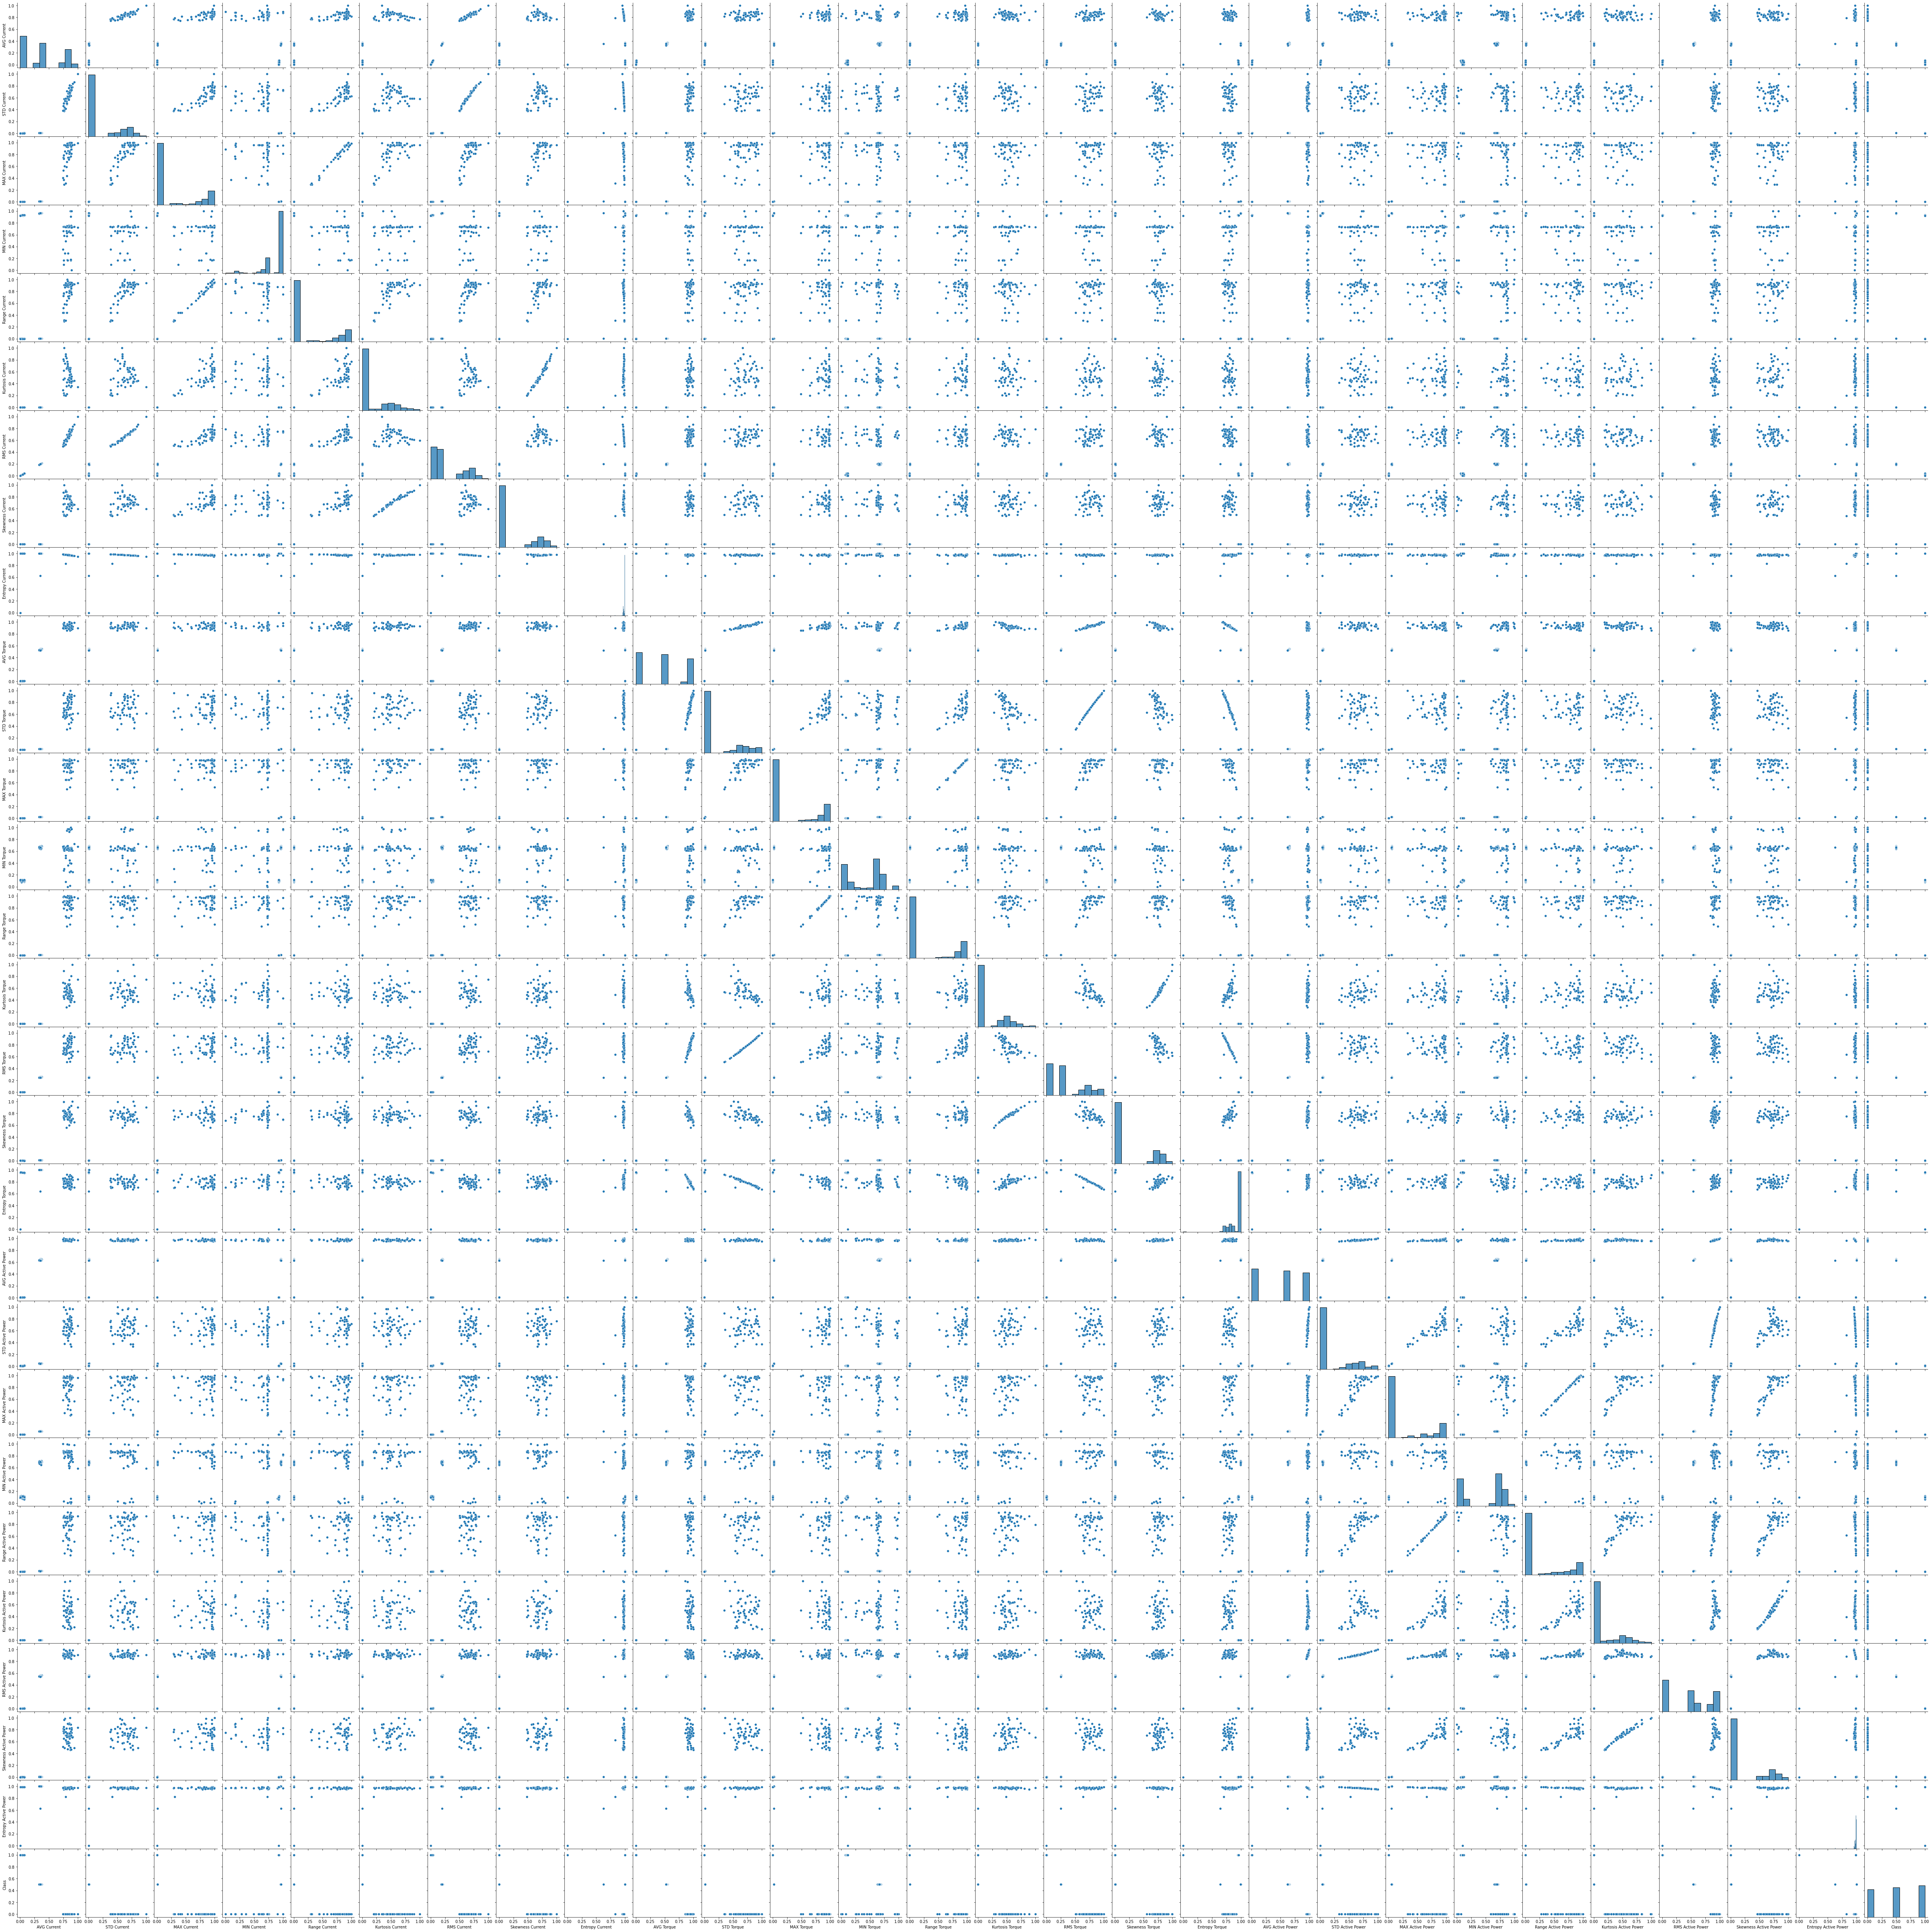

In [ ]:
sns.pairplot(df_norm)

A partir dos graficos acima, observamos a baixa correlação entre as diversas variáveis. A seguir serão separados dados para treinamento e testes dos classificadores 

# Separação d dados para Treinamento e Testes

Separação de dados

In [19]:
y = df.iloc[:, 27]
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

# Definindo os dados para analise


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_norm, y, test_size = 0.2)
x_test.describe()


,AVG Current,STD Current,MAX Current,MIN Current,Range Current,Kurtosis Current,RMS Current,Skewness Current,Entropy Current,AVG Torque,...,AVG Active Power,STD Active Power,MAX Active Power,MIN Active Power,Range Active Power,Kurtosis Active Power,RMS Active Power,Skewness Active Power,Entropy Active Power,Class
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.376075,0.198286,0.240253,0.876177,0.229284,0.135566,0.274976,0.198206,0.965131,0.433378,...,0.480370,0.210148,0.271410,0.485298,0.244569,0.175049,0.435552,0.228661,0.960784,0.554054
std,0.344148,0.315001,0.384835,0.107460,0.369194,0.221858,0.294821,0.310612,0.163600,0.390443,...,0.419070,0.303749,0.394021,0.330351,0.381875,0.297637,0.387401,0.357609,0.162736,0.421370
min,0.002670,0.000194,0.000156,0.647908,0.000561,0.000060,0.001505,0.000097,0.000000,0.000000,...,0.000000,0.000982,0.000649,0.063692,0.000294,0.000070,0.000000,0.000508,0.000000,0.000000
25%,0.058415,0.001898,0.001727,0.734452,0.001332,0.000350,0.032866,0.001039,0.978326,0.003666,...,0.004670,0.007411,0.001654,0.103397,0.002094,0.000322,0.004528,0.001577,0.981744,0.000000
50%,0.343066,0.006191,0.007168,0.928317,0.002679,0.000497,0.192464,0.001946,0.999944,0.533493,...,0.636945,0.044232,0.056419,0.685138,0.011649,0.000622,0.550330,0.006497,0.988376,0.500000
75%,0.806968,0.504894,0.591890,0.961612,0.580741,0.341545,0.581038,0.591036,0.999971,0.883060,...,0.957236,0.509759,0.630719,0.711039,0.577870,0.338803,0.871262,0.598980,0.999484,1.000000
max,1.000000,1.000000,1.000000,0.968217,0.951605,0.635495,1.000000,0.802642,0.999995,1.000000,...,0.995943,0.977730,1.000000,0.987686,0.963237,1.000000,0.991653,1.000000,0.999932,1.000000


# **Algoritimos para Classificação de Estrelas**

# Árvore de Decisão


 Criando o Modelo

In [21]:
classificador = tree.DecisionTreeClassifier()
arvore = classificador.fit(x_train,y_train)

Treinando e Testando

In [22]:
arvore = classificador.fit(x_train,y_train)

Comparando a resposta do algoritmo com as respostas reais do dataset

In [23]:
y_resp = arvore.predict(x_test)
y_resp

array([0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1])

In [27]:
y_test[:]

39     0
74     1
3      0
158    2
40     0
147    2
182    2
76     1
127    2
75     1
151    2
71     1
62     1
168    2
143    2
29     0
4      0
83     1
108    1
47     0
28     0
120    2
53     0
5      0
92     1
181    2
173    2
145    2
49     0
167    2
105    1
141    2
129    2
19     0
84     1
179    2
107    1
Name: Class, dtype: int64

<function matplotlib.pyplot.close(fig=None)>

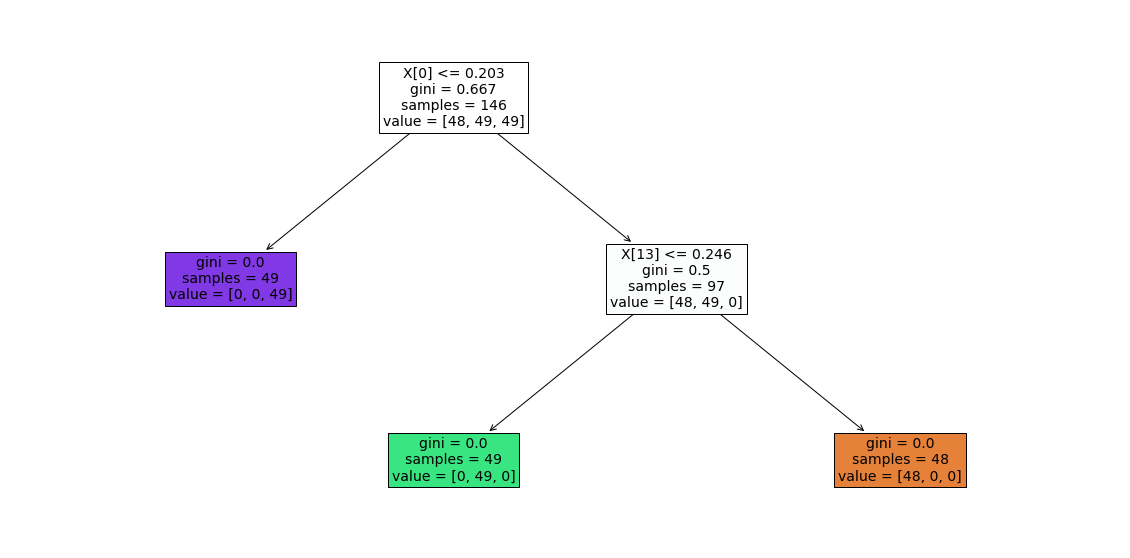

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(classificador,filled=True,fontsize=14)
plt.savefig('Árvore')
plt.close 

In [ ]:
classificador.get_depth()

2

Observamos que a arvore de decisão é relativamente simples, possui apenas 2 camadas, isso facilitará uma Análise utilizando esta base. 

In [28]:
accuracy_score(y_test,y_resp)

1.0

 Alto valor de acurácia devido a base de dados.

# Vizinho mais próximo (KNN)

In [29]:
from sklearn.neighbors import KNeighborsClassifier 

A seguir será padronizado a classificação pelos 10 vizinhos mais próximos 

In [30]:
kclassifier = KNeighborsClassifier(n_neighbors=10)

Treinando e Testanto

In [31]:
kclassifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
y_resp=kclassifier.predict(x_test)
y_resp

array([0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1])

In [33]:
y_test

39     0
74     1
3      0
158    2
40     0
147    2
182    2
76     1
127    2
75     1
151    2
71     1
62     1
168    2
143    2
29     0
4      0
83     1
108    1
47     0
28     0
120    2
53     0
5      0
92     1
181    2
173    2
145    2
49     0
167    2
105    1
141    2
129    2
19     0
84     1
179    2
107    1
Name: Class, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_resp)

1.0

Observa-se que a acurácia é igual algoritmo anterior.

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,y_resp,target_names = ["0","1","2"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        15

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



Nas linhas a cima analisamos as respostas utilizando a ferramenta de Classification_Report 


# Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

Criando modelo 

In [38]:
naiveBayesModel = GaussianNB()

Treinando 

In [39]:
naiveBayesModel.fit(x_train,y_train)

GaussianNB()

In [40]:
y_resp=naiveBayesModel.predict(x_test)
y_resp

array([0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1])

In [41]:
y_test

39     0
74     1
3      0
158    2
40     0
147    2
182    2
76     1
127    2
75     1
151    2
71     1
62     1
168    2
143    2
29     0
4      0
83     1
108    1
47     0
28     0
120    2
53     0
5      0
92     1
181    2
173    2
145    2
49     0
167    2
105    1
141    2
129    2
19     0
84     1
179    2
107    1
Name: Class, dtype: int64

In [42]:
accuracy_score(y_test,y_resp)

0.972972972972973

Pela acurácia percebemos que o Naive Bayes não é tão preciso quanto a arvore de decisão ou KNN, mas apresenta um resultado satisfatório. A seguir podemos observamos informações de nossa classificação de forma mais detalhada. 

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_resp,target_names = ["0","1","2"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.97        15

    accuracy                           0.97        37
   macro avg       0.97      0.98      0.97        37
weighted avg       0.98      0.97      0.97        37



# SVM

Importando bibliotecas

In [45]:
from sklearn import svm 
from sklearn.model_selection import train_test_split 



Com o intuíto de melhorar os resultados com o algoritmo SVM, a base de dados foi separada novamente afim de aumentar o range de treinamentos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:

X_train, X_test, Y_train, Y_teste = train_test_split(x_test,y_test,test_size=0.2, random_state=10)

Treinando e Testando

In [51]:
svmClassifier= svm.SVC()

In [52]:
svmClassifier.fit(X_train,Y_train)

SVC()

In [53]:
y_resp = svmClassifier.predict(X_test)  
y_resp

array([1, 2, 0, 1, 1, 2, 0, 2])

In [54]:
accuracy_score(Y_teste,y_resp)

1.0

# **Conclusão**

Neste trabalho confeccionei um Dataset com dados reais das capturas de pacotes de minha iniciação cientifica, alguns atributos possuíam dados determinantes entre as entradas e a saída, isto ocasionou uma acurácia alta em todos os modelos, o Algoritmo que mais se destacou foi a Árvore de decisão, KNN e SVM (todos com acurácia de 100%), %), Naive Bayes vem na sequencia com acurácia de 97%. 
Foram utilizados os mesmos dados para treinamento objetivando comparar cada classificador, como muitos apresentaram resultados positivos, acredito precisaremos reavaliar a base de dados para novos testes.
